In [2]:
#import packages 
from __future__ import division
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm
import pylab as pl
import numpy as np
from patsy import dmatrices
from statsmodels.nonparametric.kde import KDEUnivariate
from statsmodels.nonparametric import smoothers_lowess
# remove warnings
import warnings
warnings.filterwarnings('ignore')
pd.options.display.max_columns = 100
from matplotlib import pyplot as plt
import matplotlib
matplotlib.style.use('ggplot')
import numpy as np
from sklearn.preprocessing import OneHotEncoder
pd.options.display.max_rows = 100
%matplotlib inline

In [3]:
#import data 
#Read in data from source 
df_train = pd.read_csv("heads.csv")
df_train.head()

,Heads
0,1
1,0
2,0
3,1
4,1


In [4]:
df_train.describe()
data=df_train

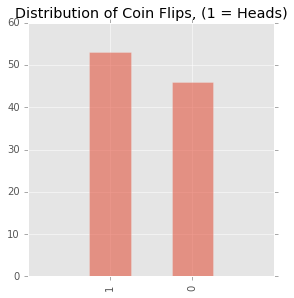

In [5]:
#Visualizing the clean data

fig = plt.figure(figsize=(15,10), dpi=1600) 
alpha=alpha_scatterplot = 0.2 
alpha_bar_chart = 0.55

ax1 = plt.subplot2grid((2,3),(0,0))
# plots a bar graph of those who surived vs those who did not.               
data.Heads.value_counts().plot(kind='bar', alpha=alpha_bar_chart)
ax1.set_xlim(-1, 2)
plt.title("Distribution of Coin Flips, (1 = Heads)")    



In [6]:
# encoding in dummy variable
titles_dummies = pd.get_dummies(data['Heads'],prefix='Heads')
datatrain = pd.concat([data,titles_dummies],axis=1)

In [7]:
datatrain

,Heads,Heads_0,Heads_1
0,1,0.0,1.0
1,0,1.0,0.0
2,0,1.0,0.0
3,1,0.0,1.0
4,1,0.0,1.0
5,1,0.0,1.0
6,0,1.0,0.0
7,1,0.0,1.0
8,1,0.0,1.0
9,0,1.0,0.0


In [8]:
datatrain.describe()

,Heads,Heads_0,Heads_1
count,99.000000,99.000000,99.000000
mean,0.535354,0.464646,0.535354
std,0.501287,0.501287,0.501287
min,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000
50%,1.000000,0.000000,1.000000
75%,1.000000,1.000000,1.000000
max,1.000000,1.000000,1.000000
